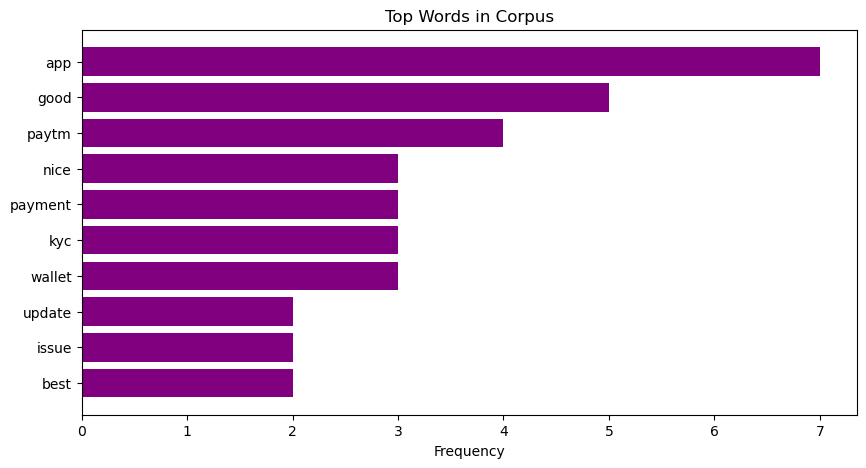

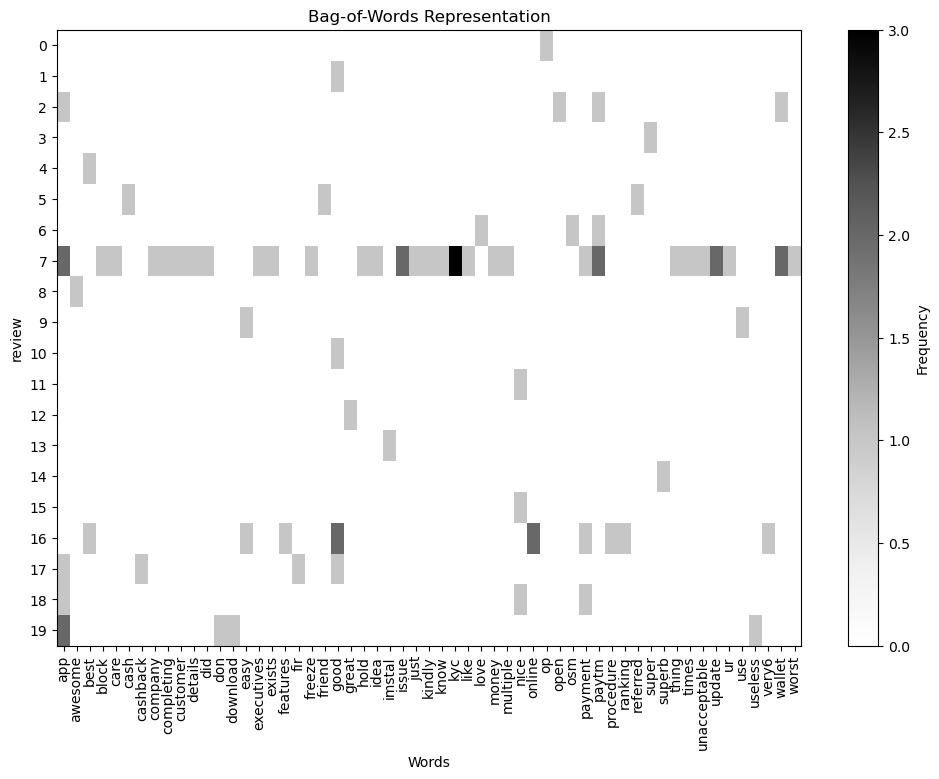

C:\Users\venka\anaconda3\Lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\venka\AppData\Local\Temp\ipykernel_21948\3976031408.py:46: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances, method='ward')


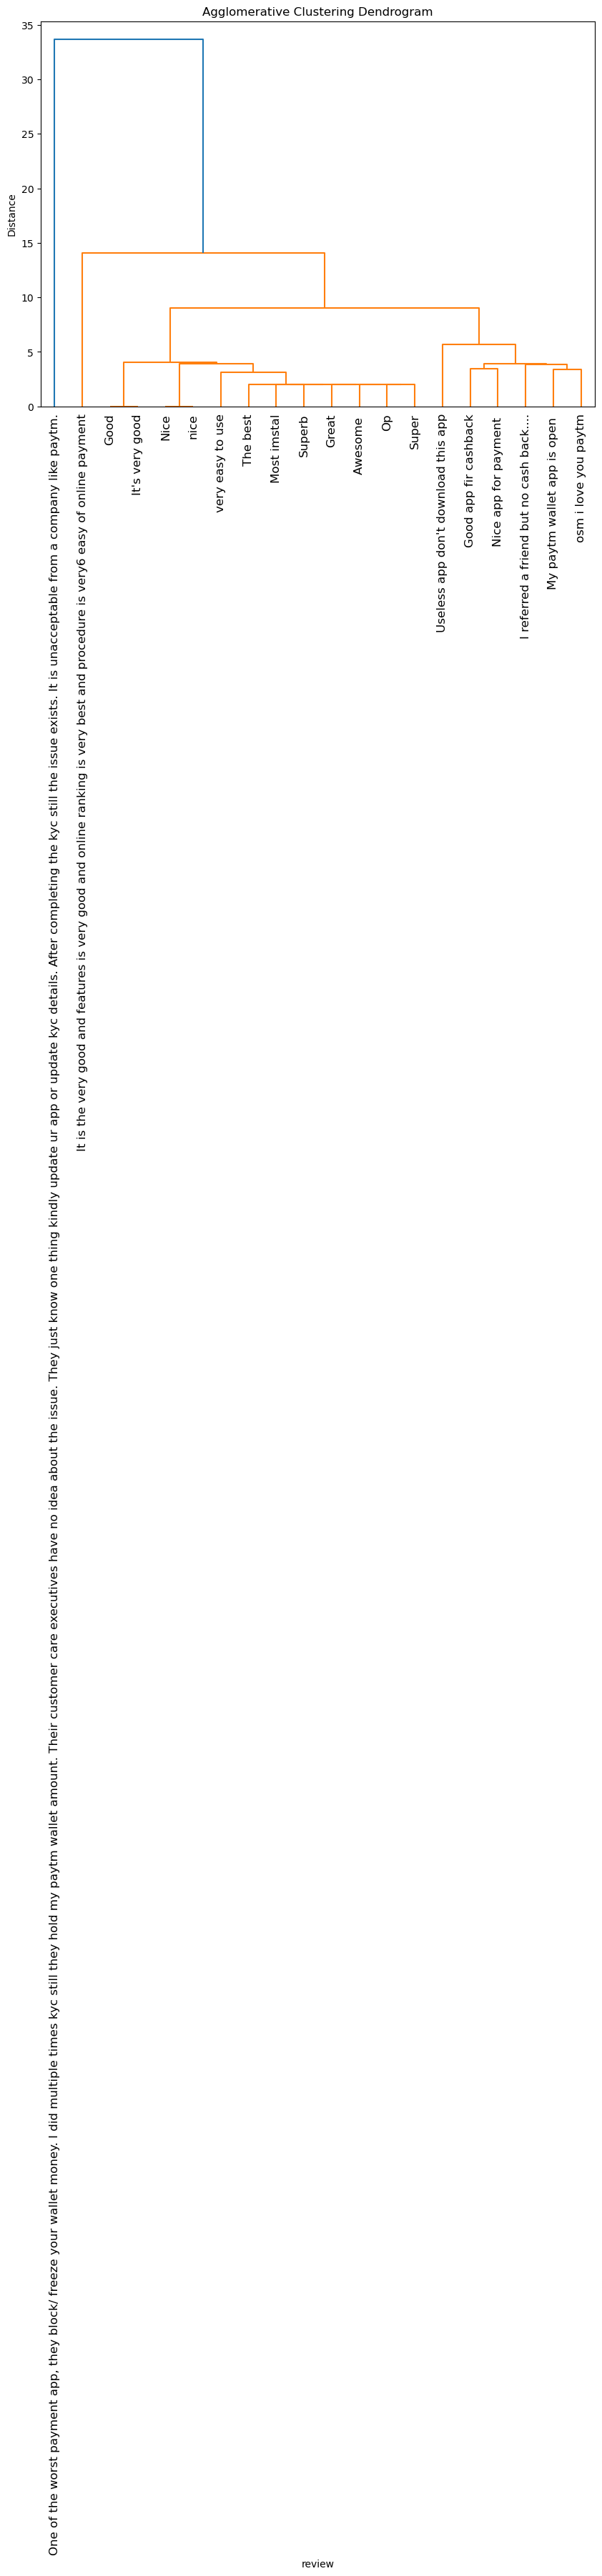

C:\Users\venka\AppData\Local\Temp\ipykernel_21948\3976031408.py:55: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances, method='ward')


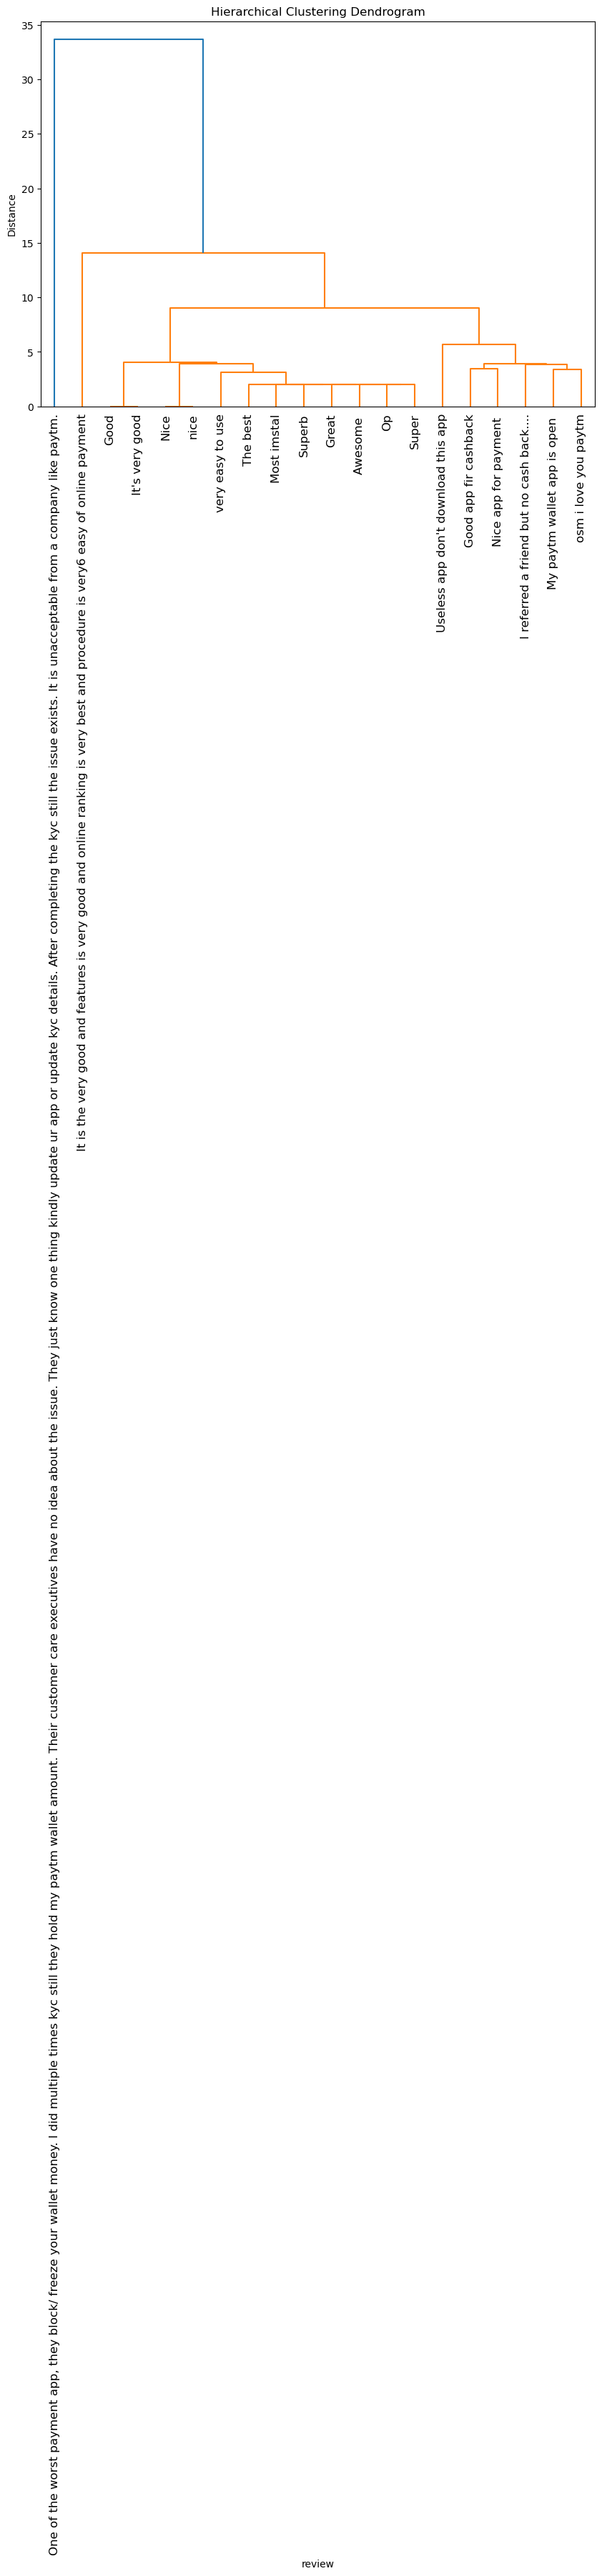

                                               review  agglo_cluster  \
0                                                  Op              1   
1                                                Good              1   
2                        My paytm wallet app is open               2   
3                                               Super              1   
4                                            The best              1   
5            I referred a friend but no cash back....              2   
6                                osm i love you paytm              2   
7   One of the worst payment app, they block/ free...              5   
8                                            Awesome               1   
9                                    very easy to use              1   
10                                     It's very good              1   
11                                               Nice              1   
12                                              Great           

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Step 1: Load your data from CSV file
df = pd.read_excel('Abhiram_paytm.xlsx',nrows=20) # Replace with your Excel file path
# Assuming your comments are in a column named 'comments'
comments = df['review'] # Replace 'comments' with your actual column name
# Step 2: Create a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)
# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')
# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(10)
# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='purple')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency on top
plt.show()
# --- Bag-of-Words Visualization ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df, cmap='Greys', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('review')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(bag_of_words_df)), labels=df.index)
plt.show()
# --- Agglomerative Clustering ---
# Step 4: Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances)
# Step 5: Plot Dendrogram for Agglomerative Clustering
linkage_matrix_agglo = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values, leaf_rotation=90)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('review')
plt.ylabel('Distance')
plt.show()
# --- Hierarchical Clustering ---
# Step 6: Perform Hierarchical Clustering and plot dendrogram
linkage_matrix_hierarchical = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('review')
plt.ylabel('Distance')
plt.show()
# Optional: Cut the dendrogram to form flat clusters
max_d = 5 # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')
# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = clusters_agglo
df['hierarchical_cluster'] = clusters_hierarchical
# Print out the comments with their corresponding cluster labels
print(df[['review', 'agglo_cluster', 'hierarchical_cluster']])